### Optimal control of the FHN model
This notebook shows how to compute the optimal control signal for the FHN model for a simple example task

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

if os.getcwd().split(os.sep)[-1] == "optimal_control":
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.fhn import FHNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_fhn

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We stimulate the system with a known control signal, define the resulting activity as target, and compute the optimal control for this target. The optimal control signal should converge to the input signal.

In [11]:
# We import the model
fhn = FHNModel()

# Some parameters to define stimulation signals
dt = fhn.params["dt"]
duration = 8.
amplitude = 1.

# We define a "zero-input", and a sine-input
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
input = np.copy(zero_input)
input[0,1:-2] = np.sin(np.arange(0,duration-0.2, dt)) # other functions or random values can be used as well

# We set the duration of the simulation and the initial values
fhn.params["duration"] = duration
x_init = 0.
y_init = 0.
fhn.params["xs_init"] = np.array([[x_init]])
fhn.params["ys_init"] = np.array([[y_init]])

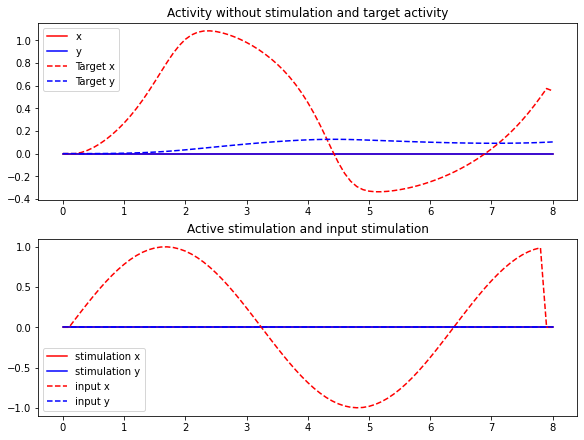

In [12]:
# We set the stimulus in x and y variables, and run the simulation
fhn.params["x_ext"] = input
fhn.params["y_ext"] = zero_input
fhn.run()

# Define the result of the stimulation as target
x_target = np.vstack( [0., fhn.x.T])
y_target = np.vstack( [0., fhn.y.T])
target = np.column_stack(( [x_target, y_target] )).T

# Remove stimuli and re-run the simulation
fhn.params["x_ext"] = zero_input
fhn.params["y_ext"] = zero_input
fhn.run()

# combine initial value and simulation result to one array
x = np.vstack( [x_init, fhn.x.T])
y = np.vstack( [y_init, fhn.y.T])

fig, ax = plt.subplots( 2,1, figsize=(8,6), constrained_layout=True)

# Plot the target (dashed line) and unperturbed activity
t_array = np.arange(0, duration+dt, dt)

ax[0].plot(t_array, x, label="x", color=color_x)
ax[0].plot(t_array, y, label="y", color=color_y)
ax[0].plot(t_array, x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].plot(t_array, y_target, linestyle='dashed', label="Target y", color=color_y)
ax[0].legend()
ax[0].set_title("Activity without stimulation and target activity")

# Plot the target control signal (dashed line) and "initial" zero control signal
ax[1].plot(t_array, zero_input[0,:], label="stimulation x", color=color_x)
ax[1].plot(t_array, zero_input[0,:], label="stimulation y", color=color_y)
ax[1].plot(t_array, input[0,:], linestyle='dashed', label="input x", color=color_x)
ax[1].plot(t_array, zero_input[0,:], linestyle='dashed', label="input y", color=color_y)
ax[1].legend()
ax[1].set_title("Active stimulation and input stimulation")

plt.show()

ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!


Cost in iteration 1: 12.894114922818574
Cost in iteration 2: 12.444819225809507
diverging model output, decrease step size to  7.0
diverging model output, decrease step size to  4.8999999999999995
diverging model output, decrease step size to  3.4299999999999993
diverging model output, decrease step size to  2.4009999999999994
diverging model output, decrease step size to  1.6806999999999994
Cost in iteration 100: 0.1659632308072267
Cost in iteration 200: 0.046284057320270695
Cost in iteration 300: 0.018407432196968
Cost in iteration 400: 0.008615427848482713
Cost in iteration 500: 0.004480994936466691


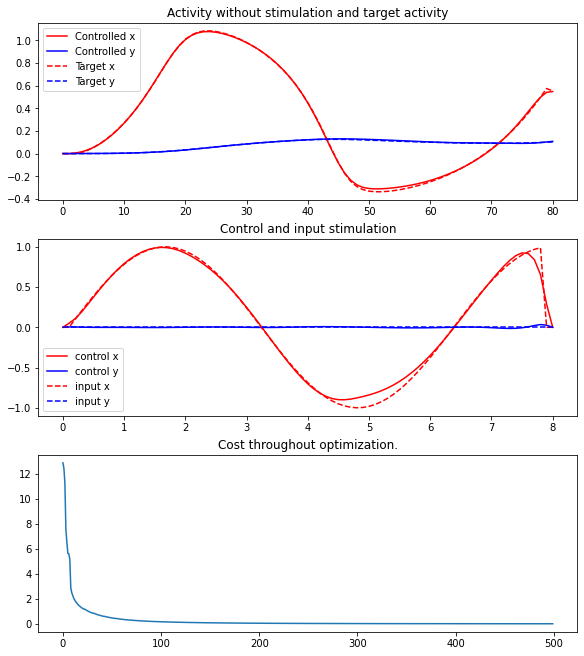

In [13]:
# We load the optimal control class
# print array (optinal parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
fhn_controlled = oc_fhn.OcFhn(fhn, target, w_p=1, w_2=0, print_array=[1,2,100,200,300,400,500])


# We run 500 iterations of the optimal control gradient descent algorithm
fhn_controlled.optimize(500)

# combine the initial values and time series of controlled model to one array
x_oc = np.vstack( [fhn_controlled.model.params["xs_init"], fhn_controlled.model.x.T])
y_oc = np.vstack( [fhn_controlled.model.params["ys_init"], fhn_controlled.model.y.T])

control = fhn_controlled.control


fig, ax = plt.subplots( 3,1, figsize=(8,9), constrained_layout=True)

# Plot the target (dashed line) and controlled activity
ax[0].plot(x_oc, label="Controlled x", color=color_x)
ax[0].plot(y_oc, label="Controlled y", color=color_y)
ax[0].plot(x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].plot(y_target, linestyle='dashed', label="Target y", color=color_y)
ax[0].legend()
ax[0].set_title("Activity with stimulation and target activity")

# Plot the target control signal (dashed line) and control signal after 500 iterations
ax[1].plot(t_array, control[0,:], label="control x", color=color_x)
ax[1].plot(t_array, control[1,:], label="control y", color=color_y)
ax[1].plot(t_array, input[0,:], linestyle='dashed', label="input x", color=color_x)
ax[1].plot(t_array, zero_input[0,:], linestyle='dashed', label="input y", color=color_y)
ax[1].legend()
ax[1].set_title("Control and input stimulation")

# Plot the cost as function of iteration
ax[2].plot(fhn_controlled.cost_history)
ax[2].set_title("Cost throughout optimization.")
plt.show()

In [5]:
# Do another 100 iterations if you want to
# repeated execution will continue with further 100 iterations
fhn_controlled.optimize(100)

Cost in iteration 1: 0.004469788022886374
Cost in iteration 2: 0.0044327269194992264
Cost in iteration 100: 0.002514608407646555


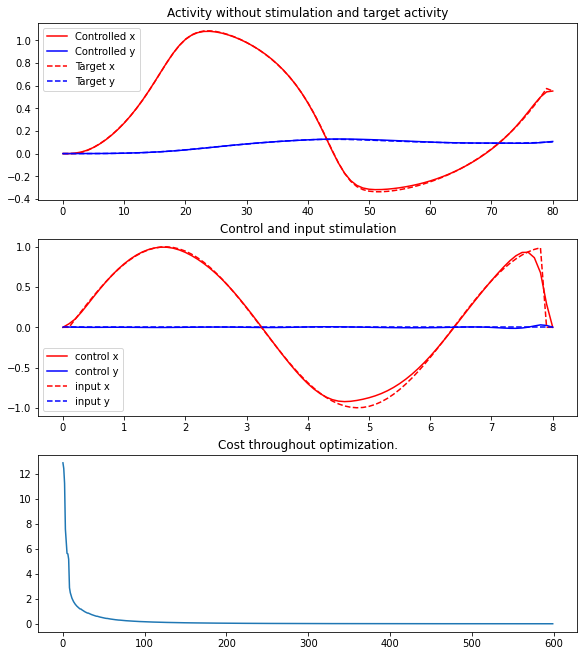

In [6]:

x_oc = np.vstack( [fhn_controlled.model.params["xs_init"], fhn_controlled.model.x.T])
y_oc = np.vstack( [fhn_controlled.model.params["ys_init"], fhn_controlled.model.y.T])

control = fhn_controlled.control

# Plot the results again
fig, ax = plt.subplots( 3,1, figsize=(8,9), constrained_layout=True)

ax[0].plot(x_oc, label="Controlled x", color=color_x)
ax[0].plot(y_oc, label="Controlled y", color=color_y)
ax[0].plot(x_target, linestyle='dashed', label="Target x", color=color_x)
ax[0].plot(y_target, linestyle='dashed', label="Target y", color=color_y)
ax[0].legend()
ax[0].set_title("Activity with stimulation and target activity")

ax[1].plot(t_array, control[0,:], label="control x", color=color_x)
ax[1].plot(t_array, control[1,:], label="control y", color=color_y)
ax[1].plot(t_array, input[0,:], linestyle='dashed', label="input x", color=color_x)
ax[1].plot(t_array, zero_input[0,:], linestyle='dashed', label="input y", color=color_y)
ax[1].legend()
ax[1].set_title("Control and input stimulation")

ax[2].plot(fhn_controlled.cost_history)
ax[2].set_title("Cost throughout optimization.")
plt.show()